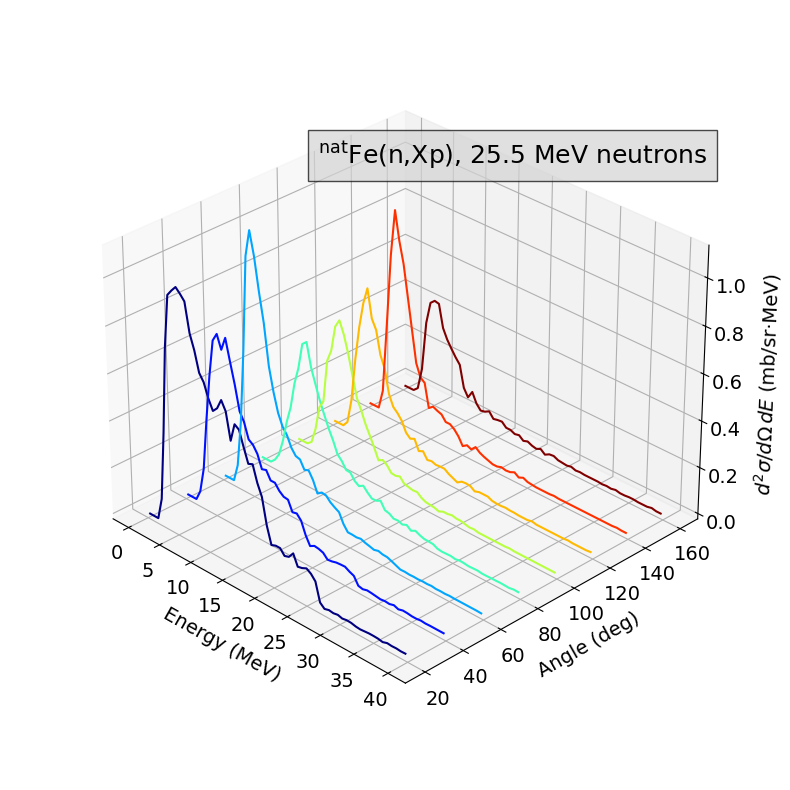

In [143]:
import numpy as np
import matplotlib.pyplot as plt

angles = [20, 40, 60, 80, 100, 120, 140, 160]
colors = plt.cm.jet(np.linspace(0, 1, len(angles)))  # paleta de cores


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

# Plotar os histogramas empilhados
for i, angle in enumerate(angles):
    data = np.loadtxt(f"FeHist_angle{angle}.txt")
    x = data[:, 0]
    y = data[:, 1]
    z = np.full_like(x, angle)  # ângulo como deslocamento em Z

    ax.plot(x, z, y, color=colors[i], label=f"{angle}°")

ax.set_xlabel('Energy (MeV)', labelpad=10, fontsize=14)
ax.set_ylabel('Angle (deg)', labelpad=10, fontsize=14)
ax.set_zlabel(r"$d^2\sigma /d\Omega\,dE$ (mb/sr·MeV)", labelpad=10, fontsize=14)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='z', labelsize=14)
ax.text2D(0.4, 0.8, r"$^{\text{nat}}$Fe(n,Xp), 25.5 MeV neutrons", transform=ax.transAxes,
          fontsize=18, 
          bbox=dict(boxstyle="square,pad=0.4", 
                    facecolor="lightgray", 
                    edgecolor="black",
                    alpha=0.7))


#plt.legend()
#plt.legend(loc='upper left', bbox_to_anchor=(0.85, 0.7))
ax.view_init(elev=30, azim=315)

# 🔧 AQUI RESOLVE O PROBLEMA:

ax.set_box_aspect(aspect=None, zoom=0.85)
plt.savefig("fe_spectra_3D_fixed2_face.png", dpi=300)
plt.show()

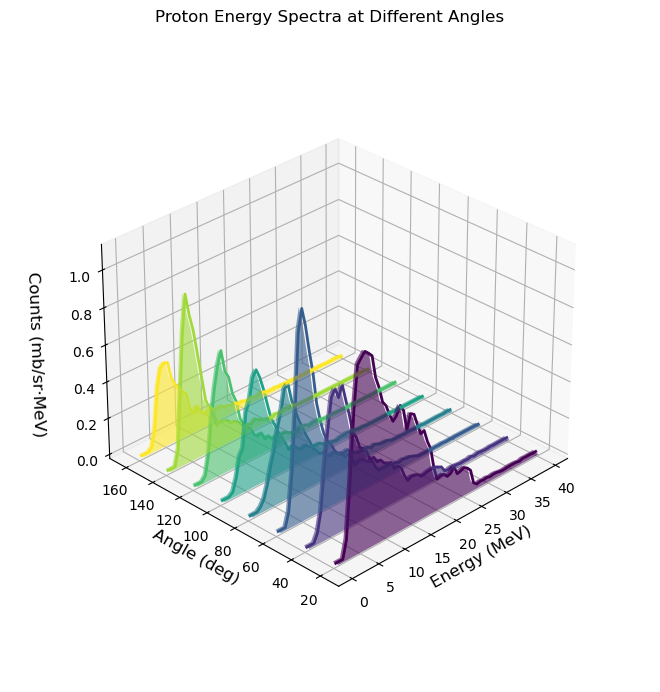

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

angles = [20, 40, 60, 80, 100, 120, 140, 160]
colors = plt.cm.viridis(np.linspace(0, 1, len(angles)))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Largura da faixa no eixo dos ângulos
delta_angle = 2.0

for i, angle in enumerate(angles):
    filename = f"FeHist_angle{angle}.txt"
    data = np.loadtxt(filename)
    x = data[:, 0]         # Energia
    y = data[:, 1]         # Conteúdo do histograma
    
    # Construir as duas “bordas” da faixa no eixo y (ângulo)
    y_low = angle - delta_angle
    y_high = angle + delta_angle
    
    # Pontos da faixa (superfície entre base zero e curva)
    X = np.concatenate([x, x[::-1]])
    Y = np.concatenate([np.full_like(x, y_low), np.full_like(x, y_high)])
    Z = np.concatenate([np.zeros_like(y), y[::-1]])
    
    # Plotar a superfície preenchida da faixa
    verts = [list(zip(X, Y, Z))]
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    poly = Poly3DCollection(verts, alpha=0.6, facecolor=colors[i])
    ax.add_collection3d(poly)
    
    # Plotar também a curva “topo” para destacar a borda superior
    ax.plot(x, np.full_like(x, angle), y, color=colors[i], linewidth=2)

ax.set_xlabel("Energy (MeV)", fontsize=12)
ax.set_ylabel("Angle (deg)", fontsize=12)
ax.set_zlabel("Counts (mb/sr·MeV)", fontsize=12, labelpad=15)
ax.set_title("Proton Energy Spectra at Different Angles", pad=15)
ax.view_init(elev=30, azim=225)
fig.subplots_adjust(left=0.1, right=0.85, bottom=0.1, top=0.9)
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig("fe_spectra_3D_filled.png", dpi=300, bbox_inches='tight')
plt.show()


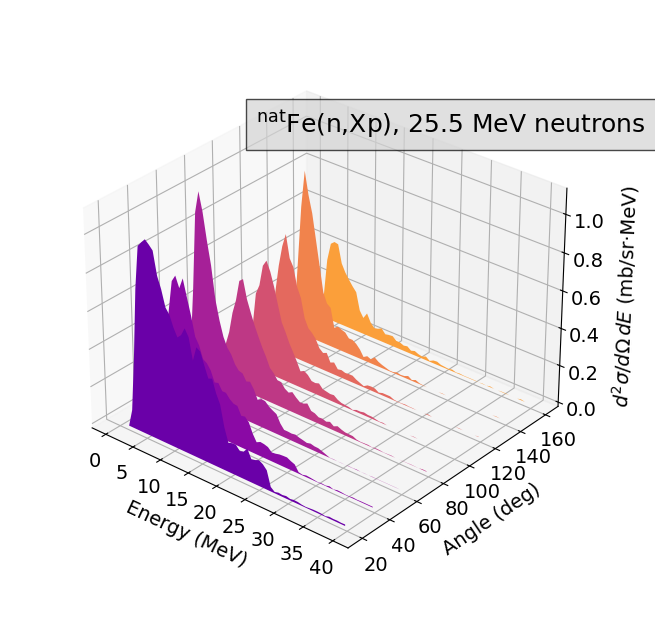

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

angles = [20, 40, 60, 80, 100, 120, 140, 160]
colors = plt.cm.plasma(np.linspace(0.2, 0.78, len(angles)))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for i, angle in enumerate(angles):
    data = np.loadtxt(f"FeHist_angle{angle}.txt")
    x = data[:, 0]
    y = data[:, 1]

    # Construir os vértices do polígono preenchido para o histograma empilhado
    verts = []
    # Começa com a base no zero, sobe pelos pontos do histograma, volta para zero
    verts.append((x[0], angle, 0))
    for xi, yi in zip(x, y):
        verts.append((xi, angle, yi))
    verts.append((x[-1], angle, 0))

    # Criar a face poligonal para preenchimento sólido
    poly = Poly3DCollection([verts], facecolor=colors[i], alpha=1)
    ax.add_collection3d(poly)

    # Opcional: desenhar a linha da borda
    #ax.plot(x, np.full_like(x, angle), y, color='k', linewidth=1)

ax.set_xlabel('Energy (MeV)', labelpad=10, fontsize=14)
ax.set_ylabel('Angle (deg)', labelpad=10, fontsize=14)
ax.set_zlabel(r"$d^2\sigma /d\Omega\,dE$ (mb/sr·MeV)", labelpad=10, fontsize=14)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='z', labelsize=14)
ax.text2D(0.4, 0.8, r"$^{\text{nat}}$Fe(n,Xp), 25.5 MeV neutrons", transform=ax.transAxes,
          fontsize=18, 
          bbox=dict(boxstyle="square,pad=0.4", 
                    facecolor="lightgray", 
                    edgecolor="black",
                    alpha=0.7))

ax.view_init(elev=30, azim=310)
ax.set_box_aspect(aspect=None, zoom=0.85)
plt.savefig("fe_spectra_3D_fixed3.png", dpi=300)
plt.show()


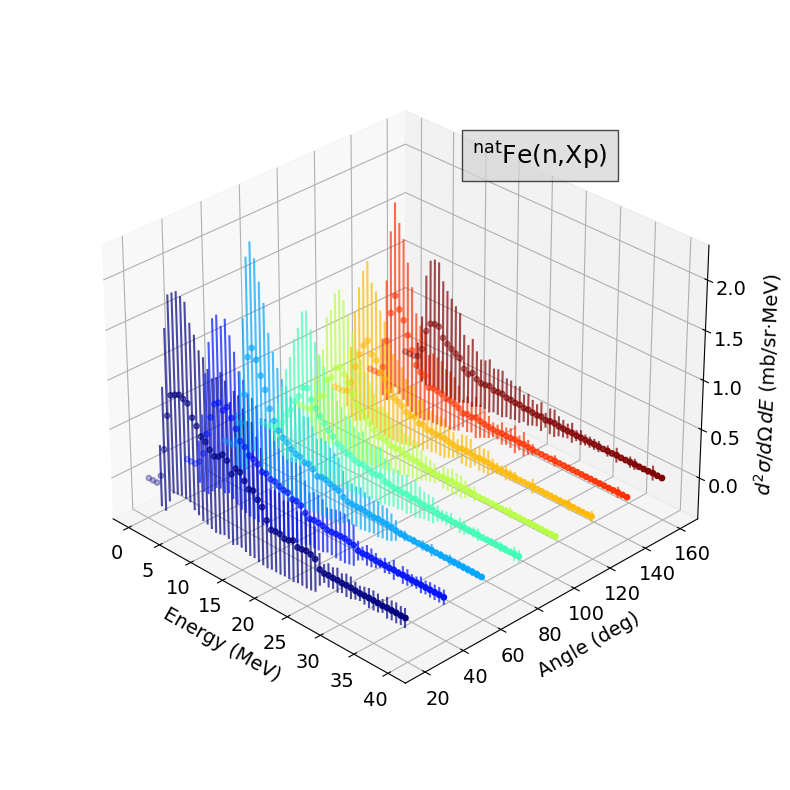

In [138]:
import numpy as np
import matplotlib.pyplot as plt

angles = [20, 40, 60, 80, 100, 120, 140, 160]
colors = plt.cm.jet(np.linspace(0, 1, len(angles)))  # paleta de cores

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

for i, angle in enumerate(angles):
    data = np.loadtxt(f"FeHist_angle{angle}.txt")
    x = data[:, 0]               # Energia
    y = data[:, 1]               # d²σ/dΩdE
    z = np.full_like(x, angle)   # ângulo

    # Erro estatístico assumido como raiz de N (aproximado como sqrt(y) aqui)
    yerr = np.sqrt(np.abs(y))  # abs para evitar NaNs se y < 0

    # Plotar pontos como bolinhas
    ax.scatter(x, z, y, color=colors[i], label=f"{angle}°", s=15)

    # Adicionar barras de erro verticais
    for xi, zi, yi, dyi in zip(x, z, y, yerr):
        ax.plot([xi, xi], [zi, zi], [yi - dyi, yi + dyi], color=colors[i], alpha=0.7)

ax.set_xlabel('Energy (MeV)', labelpad=10, fontsize=14)
ax.set_ylabel('Angle (deg)', labelpad=10, fontsize=14)
ax.set_zlabel(r"$d^2\sigma /d\Omega\,dE$ (mb/sr·MeV)", labelpad=10, fontsize=14)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='z', labelsize=14)

ax.text2D(0.6, 0.8, r"$^{\text{nat}}$Fe(n,Xp)", transform=ax.transAxes,
          fontsize=18, 
          bbox=dict(boxstyle="square,pad=0.4", 
                    facecolor="lightgray", 
                    edgecolor="black",
                    alpha=0.7))

ax.view_init(elev=30, azim=315)
ax.set_box_aspect(aspect=None, zoom=0.85)

plt.savefig("fe_spectra_3D_points.png", dpi=300)
plt.show()


In [2]:
import ROOT
import re

# Abre o arquivo ROOT
file = ROOT.TFile.Open("/mnt/medley/LucasAnalysis/2023/XS_calcs/Fe_p_vBin.root")

# Pega todos os keys do arquivo
keys = file.GetListOfKeys()

# Expressão regular para pegar o ângulo no nome do histo
pattern = re.compile(r"p_ang_(\d+)_deg_25\.0_27\.0MeV_MatchC")

for key in keys:
    name = key.GetName()
    match = pattern.match(name)
    if match:
        angle = match.group(1)
        hist = file.Get(name)
        if not hist:
            print(f"Histograma {name} não encontrado.")
            continue
        
        filename = f"FeHist_angle{angle}_v2.txt"
        with open(filename, "w") as f:
            #f.write("Ebincenter  Ebinvalue\n")
            for bin_idx in range(1, hist.GetNbinsX() + 1):
                center = hist.GetBinCenter(bin_idx)
                value = hist.GetBinContent(bin_idx)
                f.write(f"{center}  {value}\n")

        print(f"Arquivo {filename} gerado.")


Arquivo FeHist_angle20_v2.txt gerado.
Arquivo FeHist_angle40_v2.txt gerado.
Arquivo FeHist_angle60_v2.txt gerado.
Arquivo FeHist_angle80_v2.txt gerado.
Arquivo FeHist_angle100_v2.txt gerado.
Arquivo FeHist_angle120_v2.txt gerado.
Arquivo FeHist_angle140_v2.txt gerado.
Arquivo FeHist_angle160_v2.txt gerado.


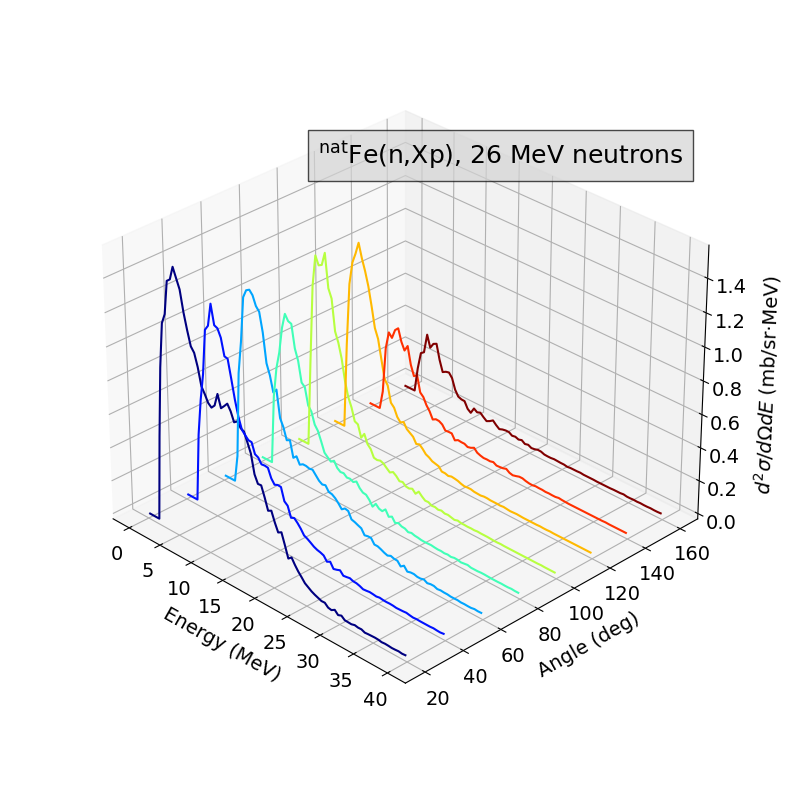

In [5]:
import numpy as np
import matplotlib.pyplot as plt

angles = [20, 40, 60, 80, 100, 120, 140, 160]
colors = plt.cm.jet(np.linspace(0, 1, len(angles)))  # paleta de cores

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

# Plotar os histogramas empilhados
for i, angle in enumerate(angles):
    data = np.loadtxt(f"FeHist_angle{angle}_v2.txt")
    x = data[:, 0]
    y = data[:, 1]
    z = np.full_like(x, angle)  # ângulo como deslocamento em Z

    ax.plot(x, z, y, color=colors[i], label=f"{angle}°")

ax.set_xlabel('Energy (MeV)', labelpad=10, fontsize=14)
ax.set_ylabel('Angle (deg)', labelpad=10, fontsize=14)
ax.set_zlabel(r"$d^2\sigma / d\Omega dE$ (mb/sr·MeV)", labelpad=10, fontsize=14)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='z', labelsize=14)

ax.text2D(0.4, 0.8, r"$^\mathrm{nat}$Fe(n,Xp), 26 MeV neutrons", transform=ax.transAxes,
          fontsize=18, 
          bbox=dict(boxstyle="square,pad=0.4", 
                    facecolor="lightgray", 
                    edgecolor="black",
                    alpha=0.7))

# Se quiser mostrar legenda:
# ax.legend(loc='upper left', bbox_to_anchor=(0.85, 0.7))

ax.view_init(elev=30, azim=315)

# Ajusta proporção da caixa (essa linha é o ajuste importante)
ax.set_box_aspect(aspect=None, zoom=0.85)

plt.savefig("fe_spectra_3D_fixed2_face_v2.png", dpi=300)
plt.show()
